In [1]:
#Importing the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from models.Copulae import normalCopulaSimulation, tCopulaSimulation

sns.set()

In [2]:
#Generate sample data to fit the copula on
data = np.random.normal(size=(250,20))

#Instantiate a copula object
copula = tCopulaSimulation(dispstr="un",df_fixed=True,df=3)

In [3]:
#Inspecting the raw object
copula.__dict__

{'copula': <rpy2.robjects.functions.DocumentedSTFunction object at 0x7fbe5f3f0e50> [3]
 R classes: ('function',),
 '_copula_kwargs': {'dispstr': 'un', 'df_fixed': True, 'df': 3},
 '_fit_kwargs': {},
 '_fitted': False,
 '_tCopulaSimulation__eval_df': False}

In [4]:
#Fitting data on the copula object
copula.fit(data,method="itau")

In [5]:
#Inspecting the fitted copula object
copula.__dict__

{'copula': <rpy2.robjects.functions.DocumentedSTFunction object at 0x7fbe5f3f0e50> [3]
 R classes: ('function',),
 '_copula_kwargs': {'dispstr': 'un', 'df_fixed': True, 'df': 3},
 '_fit_kwargs': {'method': 'itau'},
 '_fitted': True,
 '_tCopulaSimulation__eval_df': False,
 'dim': 20,
 '_data': array([[ 0.99422988, -0.99541374,  0.71639647, ...,  1.36200303,
         -0.05230654,  0.42406344],
        [ 0.49831596, -0.06746581, -0.83747517, ...,  0.92727916,
         -1.22774402,  0.65469704],
        [-0.91382655, -0.49830894, -0.2236127 , ..., -0.48935984,
         -1.19328781, -0.88443702],
        ...,
        [-1.1552681 ,  0.39785515,  0.80341477, ..., -0.03129341,
         -1.62339146, -0.51587738],
        [ 0.72853386,  0.61386853,  1.355223  , ..., -1.24632316,
          0.65458104,  0.65079569],
        [ 2.23773462,  0.67642019, -0.16643414, ..., -1.28698913,
          1.66571905, -0.44034939]]),
 '_params': <rpy2.robjects.vectors.FloatVector object at 0x7fbe9de5ff90> [14]
 R

In [6]:
#Inspecting the copula parameters
print(copula._params)

#The data type of the parameters is an R floatVector for seamless integration into R
print(type(copula._params))

#But can be seamlessly casted into e.g. numpy array
np.array(copula._params)

        rho.1         rho.2         rho.3         rho.4         rho.5 
-0.0867451537  0.0570475867  0.0530163196  0.0208415072 -0.0599696776 
        rho.6         rho.7         rho.8         rho.9        rho.10 
-0.0467661715  0.0136762260  0.0015644873 -0.0155937797 -0.0294182212 
       rho.11        rho.12        rho.13        rho.14        rho.15 
-0.0743706156 -0.0499922985 -0.0752764815  0.0723573618  0.0474719297 
       rho.16        rho.17        rho.18        rho.19        rho.20 
-0.0230615352 -0.0753771294 -0.0905655671  0.0063083771  0.0275012390 
       rho.21        rho.22        rho.23        rho.24        rho.25 
 0.1024202128 -0.0157956242 -0.0501939145 -0.1316894297 -0.0233642577 
       rho.26        rho.27        rho.28        rho.29        rho.30 
 0.0718540020  0.0325456937 -0.0083270168 -0.0153919345  0.0068130398 
       rho.31        rho.32        rho.33        rho.34        rho.35 
-0.0049962470  0.1072383796  0.0771886600 -0.0011607488  0.0120614046 
      

array([-0.08674515,  0.05704759,  0.05301632,  0.02084151, -0.05996968,
       -0.04676617,  0.01367623,  0.00156449, -0.01559378, -0.02941822,
       -0.07437062, -0.0499923 , -0.07527648,  0.07235736,  0.04747193,
       -0.02306154, -0.07537713, -0.09056557,  0.00630838,  0.02750124,
        0.10242021, -0.01579562, -0.05019391, -0.13168943, -0.02336426,
        0.071854  ,  0.03254569, -0.00832702, -0.01539193,  0.00681304,
       -0.00499625,  0.10723838,  0.07718866, -0.00116075,  0.0120614 ,
       -0.00640931,  0.05543519,  0.11165282,  0.00156449,  0.0639993 ,
        0.03062889,  0.06984038,  0.11105098,  0.07426996, -0.00368411,
       -0.06420075, -0.08634293,  0.00671211,  0.030528  , -0.14388593,
       -0.12558358, -0.04928663,  0.13289   , -0.10422731, -0.00832702,
       -0.05785373, -0.08211874,  0.11446087,  0.0073177 ,  0.02669406,
       -0.0394048 , -0.0436404 , -0.02326335, -0.00297757, -0.00035327,
        0.02578596, -0.06973969,  0.03809363,  0.04787521, -0.04

2000

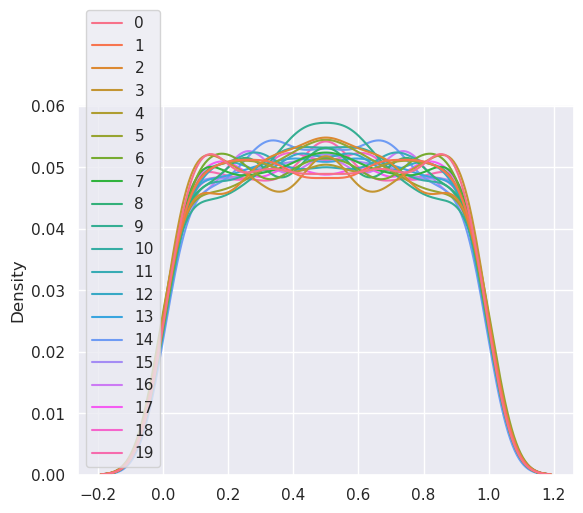

In [7]:
#Draw (predict) 1000 random uniform samples and add antithetic variates
pred_raw = copula.predict(n=1e3,anti=True)

sns.kdeplot(pred_raw)

len(pred_raw)

1000

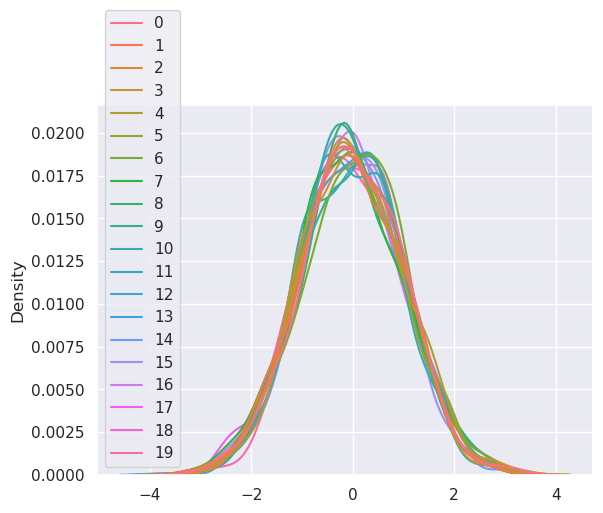

In [8]:
#Predict 1000 random samples with empirical margins without adding antithetic variates
pred_emp = copula.predict_empirical(n=1e3,anti=False)

sns.kdeplot(pred_emp)

len(pred_emp)

2000

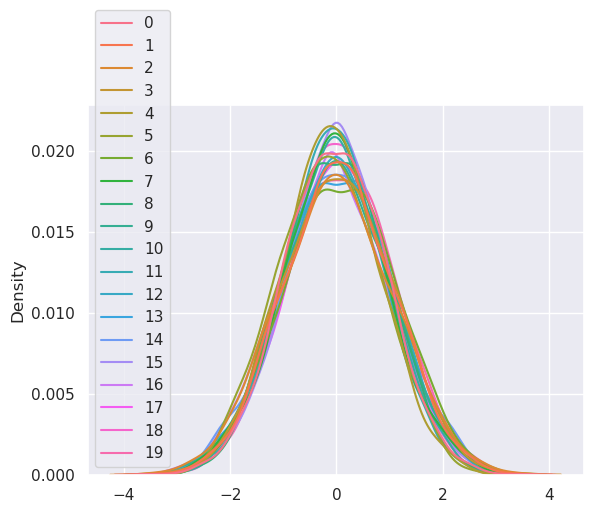

In [9]:
#Predict with parametric margin, e.g. normal margin
pred_norm = copula.predict_parametric(1e3,distribution="norm")

sns.kdeplot(pred_norm)

len(pred_norm)

In [10]:
pred_norm

array([[-1.00809760e+00,  7.00382442e-01, -6.51541902e-01, ...,
         6.08915551e-01,  8.55142831e-01,  4.97305905e-01],
       [ 1.45382066e+00,  1.02345554e+00, -2.05515587e-01, ...,
         1.96596960e+00, -6.77501712e-01,  2.54022691e-01],
       [ 8.26949527e-02, -2.15185283e-01,  9.78519011e-01, ...,
         1.52479765e-01,  2.51570558e-01, -2.98283270e-01],
       ...,
       [ 2.05262602e+00, -2.57504137e-01, -1.04524075e+00, ...,
        -2.52940709e+00, -2.01465852e+00, -2.00042341e+00],
       [ 8.01146124e-01, -2.71737915e-01,  4.66973073e-01, ...,
         6.09599122e-01,  1.04728732e-03, -4.78929583e-01],
       [-2.08713785e-02, -1.78716584e-01, -9.53086217e-01, ...,
        -9.21739740e-01,  8.45008517e-01,  1.37512284e+00]])

In [11]:
from tools.Portfolio import mu

In [12]:
mu_pf_pred = mu(pred_norm)
mu_pf_pred

array([-0.1866669 ,  0.21301638,  0.24828994, ..., -0.79284278,
        0.06594298,  0.00485359])

In [13]:
quantile = np.quantile(mu_pf_pred,0.01)
quantile

-0.5571454514181393

In [17]:
etr = mu_pf_pred.mean(where=mu_pf_pred<quantile)
etr

-0.6770718334860104

In [19]:
import pandas as pd
from backtests.Backtest import simple_hits, kupiec_test, christofferson_test, VaRTest

In [40]:
mu_pf = pd.read_pickle("data/mu_pf.pkl")
var_hist = pd.read_pickle("data/var_hist_v2.pkl")
hits = simple_hits(mu_pf,var_hist)
sum(hits)/len(hits)

0.014345991561181435

In [38]:
VaRTest(0.01,mu_pf,var_hist,0.99)

expected.exceed                                 23.0
actual.exceed                                   34.0
uc.H0                            Correct Exceedances
uc.LRstat                                   3.985495
uc.critical                                 6.634897
uc.LRp                                      0.045894
uc.Decision                        Fail to Reject H0
cc.H0              Correct Exceedances & Independent
cc.LRstat                                  30.980433
cc.critical                                  9.21034
cc.LRp                                           0.0
cc.Decision                                Reject H0
n                                               2370
dtype: object

In [8]:
from backtests.Backtest import residuals
from scipy.stats import bootstrap
import pandas as pd
import numpy as np

In [9]:
mu_pf = pd.read_pickle("data/mu_pf.pkl")
var_hist = pd.read_pickle("data/var_hist_v2.pkl")
es_hist = pd.read_pickle("data/es_hist_v2.pkl")

In [10]:
obs = residuals(mu_pf,var_hist,es_hist)

statistic = lambda a: np.mean(a)
test_result = bootstrap((obs,),statistic,confidence_level=0.99,alternative="greater")

In [11]:
test_result

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.0012110193949100385, high=array(inf)), bootstrap_distribution=array([0.00317188, 0.00319322, 0.00346944, ..., 0.00429728, 0.00397543,
       0.00371258]), standard_error=0.0020070917100992744)